# **TP 3 - Pandas + un peu de Sklearn et Matplotlib**

***

- Pandas est une librairie de manipulation de données très utilisée par les Data Analysts / Data Scientists. On peut la

[**Notions et exercices**](#notions)

0. [Vue d'ensemble](#0)
1. [1.Définition d'une DataFrame / d'une Series](#1)
2. [Lecture à partir de fichiers](#2)
3. [Principaux attributs](#3)
4. [Principales méthodes](#4)
5. [Vectorisation des opérations](#5)
6. [Itérer sur une DataFrame](#6)
7. [Aggregation - Groupby](#7)
8. [Jointure - Join](#8)
9. [Un peu de prédiction]()
10. [Visualisation des résultats]()

# 0. Vue d'ensemble


**[Inspiré de la documentation officielle](https://pandas.pydata.org/pandas-docs/stable/getting_started/overview.html)**

**[Un exemple d'analyse exploratoire avec pandas](https://www.kaggle.com/kashnitsky/topic-1-exploratory-data-analysis-with-pandas)**

- ``pandas`` est un package Python qui permet d'utiliser des structures de données optimisées et flexibles
pour travailler avec des données relationnelles (tables). ``pandas`` est construite au dessus de ``numpy``(librairie pour le calcul scientifique) ce qui lui assure un haut niveau d'optimisation.

- C'est une des librairies les plus utilisées pour l'analyse de données en Python. 
- ``pandas`` est particulièrement recommandée pour les use-cases suivant : 
    - Manipulation de données tabulaires de types différents (exactement comme une table SQL ou une spreadsheet Excel)
    - Manipulation de séries temporelles
    - Analyse statistique (si l'analyse est simple ``pandas``peut suffire, sinon, on se servira de ``pandas``pour manipuler les données et d'une autre librairie pour la modélisation
    

- Les deux structures principales que ``pandas`` fournit sont : 
    - Les series - de type ``pandas.Series``
    - Les dataframes - de type ``pandas.DataFrame``
    

- ``pandas`` permet de facilement gérer les cas suivants : 
    - Création de DataFrames à partir d'objets déjà existants : 
        - A partir d'objets Python de base
        - A partir d'objets ``numpy``   
    - Changement du format des dataframes : 
        - Ajout / suppression de colonnes (variables)
        - Ajout / suppression de lignes (observations)   
    - Indexation des observations : 
        - Les indexes peuvent être de types différents (``string``, ``int``, ``float``, ``datetime`` ...)
        - On peut avoir plusieurs indexes   
    - Aggregation / "Groupby" : 
        - On peut facilement aggréger
        - On peut facilement transformer les données en se basant sur une aggrégation
    - Slicing - sélection sur un critère :
        - Filtrer les valeurs sur une variable
        - Filtrer les valeurs sur un index   
    - Jointures / concaténation
    - Reformatage / Pivot
    - Gestion des données manquantes (représentées avec le type ``numpy.nan``) 
    - Import de données à partir de fichiers de divers types :
        - CSV
        - Excel
        - Format pickle (natif Python)
        - Format natifs SAS / R
        - HDF5
        - Import direct depuis ``SQL``    
    - Manipulation de séries temporelles

**CheatSheets**

<img src="../images/1/pandas-cheatsheet.jpeg" alt="drawing" width="4000"/>

In [69]:
import pandas as pd 
# grâce à la mention "as pd" 
# on écrira pd.item au lieu de pandas.item

<a id='1'></a>
## 1.Définition d'une DataFrame / d'une Series
***

- Définition d'une dataframe à partir de ses lignes (observations)

In [70]:
l1 = ["Jean", 25, "Paris"]
l2 = ["Max", 35, "Marseille"]
l3 = ["Henri", 34, "Nantes"]
df = pd.DataFrame([l1, l2, l3], columns=["prenom", "age", "ville"])

In [71]:
df

,prenom,age,ville
0,Jean,25,Paris
1,Max,35,Marseille
2,Henri,34,Nantes


- A partir de ses colonnes (variables)
- Définition d'une dataframe à partir de ses colonnes (variables)

In [87]:
l = [{'prenom': 'Henri', 'age': 34, 'ville': 'Paris'},
 {'prenom': "Max", 'age': 35, 'ville': "Marseille"},
 {'prenom': "Henri", 'age': 34, 'ville': "Nantes"}]
df = pd.DataFrame(l)

In [88]:
df

,prenom,age,ville
0,Henri,34,Paris
1,Max,35,Marseille
2,Henri,34,Nantes


- On peut accéder à une ligne ainsi grâce à l'index visible à gauche (ici des entiers)

In [89]:
df.loc[0]

prenom    Henri
age          34
ville     Paris
Name: 0, dtype: object

- On peut accéder à une colonne de deux façons différentes 

In [90]:
df["prenom"]

0    Henri
1      Max
2    Henri
Name: prenom, dtype: object

In [91]:
df.prenom

0    Henri
1      Max
2    Henri
Name: prenom, dtype: object

- L'objet DataFrame est de type ``pandas.core.frame.DataFrame``

In [92]:
type(df)

pandas.core.frame.DataFrame

- Ses colonnes sont des ``pandas.core.frame.Series``

In [93]:
type(df["prenom"])

pandas.core.series.Series

- Ses lignes aussi

In [94]:
df["prenom"]

0    Henri
1      Max
2    Henri
Name: prenom, dtype: object

In [95]:
df.loc[0]

prenom    Henri
age          34
ville     Paris
Name: 0, dtype: object

In [96]:
type(df.loc[0])

pandas.core.series.Series

- On peut aussi directement définir une Series : 

In [97]:
serie = pd.Series(["data scientist", "data analyst", "data engineer"])

- Et on peut créer une nouvelle colonne dans la dataframe 

In [104]:
#df["emploi"] = serie

# La syntaxe ci-dessous est invalide
df.emploi = serie 

- Sélection de plusieurs colonnes : 

In [106]:
df[["age", "ville"]]

,age,ville
0,34,Paris
1,35,Marseille
2,34,Nantes


- Sélection de plusieurs lignes

In [107]:
df.loc[[0, 1]]

,prenom,age,ville
0,Henri,34,Paris
1,Max,35,Marseille


In [108]:
df.loc[0:1]

,prenom,age,ville
0,Henri,34,Paris
1,Max,35,Marseille


## 2. Lecture à partir de fichiers / Ecriture
***

- CSV

In [153]:
df = pd.read_csv("../data/diamonds/diamonds.csv")

- On peut exporter dans différents formats : 

In [154]:
# Format pickle
# df.to_pickle("data/diamonds.pk")
# Format excel
# df.to_excel("data/diamonds.xlsx")

- Et les relire : 

In [155]:
# df = pd.read_pickle("data/diamonds.pk")
# df = pd.read_excel("data/diamonds.xlsx", engine='openpyxl')

## 3. Principaux attributs
***

- Format : (#lignes, #colonnes)

In [156]:
df.shape

(53940, 11)

- index

In [157]:
df.index

RangeIndex(start=0, stop=53940, step=1)

In [158]:
type(df.index)

pandas.core.indexes.range.RangeIndex

- Colonnes

In [159]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [160]:
type(df.columns)

pandas.core.indexes.base.Index

## 4. Principales méthodes
***

- Voir 10 premières lignes

In [161]:
df.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


- 10 dernières

In [162]:
df.tail(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53930,53931,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53931,53932,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43
53932,53933,0.70,Very Good,E,VS2,60.5,59.0,2757,5.71,5.76,3.47
53933,53934,0.70,Very Good,E,VS2,61.2,59.0,2757,5.69,5.72,3.49
53934,53935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


- 10 au hasard

In [163]:
df.sample(n=10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
52289,52290,0.71,Very Good,I,VVS2,62.5,57.0,2495,5.68,5.74,3.57
14213,14214,1.27,Ideal,F,SI1,61.8,57.0,5761,6.96,6.89,4.28
25195,25196,2.07,Premium,H,SI1,62.0,58.0,13786,8.17,8.09,5.04
19547,19548,1.02,Premium,D,VS1,60.3,58.0,8181,6.57,6.49,3.94
40841,40842,0.57,Very Good,I,SI1,61.8,57.0,1173,5.31,5.34,3.29
14915,14916,1.01,Good,E,VS2,65.4,56.0,6004,6.18,6.23,4.06
2864,2865,0.72,Ideal,D,VS2,60.5,57.0,3275,5.81,5.83,3.52
11239,11240,1.55,Good,G,I1,63.6,58.0,4965,7.34,7.29,4.65
36486,36487,0.32,Ideal,F,IF,61.8,54.0,943,4.44,4.46,2.75
24601,24602,2.02,Very Good,J,SI1,63.5,60.0,12915,7.98,7.93,5.05


- Information sur les colonnes

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


- Statistiques descriptives

In [165]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


- Quelques statistiques sur les lignes

In [166]:
df.mean(axis=0)

/var/folders/yf/7zryq8v115v8hjpz3_522bvm0000gn/T/ipykernel_37328/2681518468.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean(axis=0)


Unnamed: 0    26970.500000
carat             0.797940
depth            61.749405
table            57.457184
price          3932.799722
x                 5.731157
y                 5.734526
z                 3.538734
dtype: float64

In [167]:
df.std(axis=0)

/var/folders/yf/7zryq8v115v8hjpz3_522bvm0000gn/T/ipykernel_37328/649938150.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std(axis=0)


Unnamed: 0    15571.281097
carat             0.474011
depth             1.432621
table             2.234491
price          3989.439738
x                 1.121761
y                 1.142135
z                 0.705699
dtype: float64

In [168]:
df.median(axis=0)

/var/folders/yf/7zryq8v115v8hjpz3_522bvm0000gn/T/ipykernel_37328/2228440589.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median(axis=0)


Unnamed: 0    26970.50
carat             0.70
depth            61.80
table            57.00
price          2401.00
x                 5.70
y                 5.71
z                 3.53
dtype: float64

In [169]:
df.sum(axis=0)

Unnamed: 0                                           1454788770
carat                                                  43040.87
cut           IdealPremiumGoodPremiumGoodVery GoodVery GoodV...
color         EEEIJJIHEHJJFJEEIJJJIEHJJGIJDFFFEEDFEHDIIJDDHF...
clarity       SI2SI1VS1VS2SI2VVS2VVS1SI1VS2VS1SI1VS1SI1SI2SI...
depth                                                 3330762.9
table                                                 3099240.5
price                                                 212135217
x                                                     309138.62
y                                                     309320.33
z                                                      190879.3
dtype: object

- Sur les colonnes :

In [170]:
df[["x", "y", "z"]]

,x,y,z
0,3.95,3.98,2.43
1,3.89,3.84,2.31
2,4.05,4.07,2.31
3,4.20,4.23,2.63
4,4.34,4.35,2.75
...,...,...,...
53935,5.75,5.76,3.50
53936,5.69,5.75,3.61
53937,5.66,5.68,3.56
53938,6.15,6.12,3.74


- Trier selon une colonne

In [171]:
df.sort_values("carat")

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
31593,31594,0.20,Premium,E,VS2,61.1,59.0,367,3.81,3.78,2.32
31597,31598,0.20,Ideal,D,VS2,61.5,57.0,367,3.81,3.77,2.33
31596,31597,0.20,Premium,F,VS2,62.6,59.0,367,3.73,3.71,2.33
31595,31596,0.20,Ideal,E,VS2,59.7,55.0,367,3.86,3.84,2.30
31594,31595,0.20,Premium,E,VS2,59.7,62.0,367,3.84,3.80,2.28
...,...,...,...,...,...,...,...,...,...,...,...
25999,26000,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24
25998,25999,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
27130,27131,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43
27630,27631,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72


- Dans l'autre sens

In [172]:
df.sort_values("carat", ascending=False)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
27415,27416,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98
27630,27631,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72
27130,27131,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43
25999,26000,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24
25998,25999,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
...,...,...,...,...,...,...,...,...,...,...,...
31592,31593,0.20,Premium,E,VS2,59.0,60.0,367,3.81,3.78,2.24
31591,31592,0.20,Premium,E,VS2,59.8,62.0,367,3.79,3.77,2.26
31601,31602,0.20,Premium,D,VS2,61.7,60.0,367,3.77,3.72,2.31
14,15,0.20,Premium,E,SI2,60.2,62.0,345,3.79,3.75,2.27


- Effacer une colonne

In [173]:
df.drop("Unnamed: 0", axis=1) # renvoie une dataframe

# pour faire la modification en place : 
# df = df.drop("Unnamed: 0", axis=1)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


- Ou une ligne

In [174]:
df.drop(12, axis=0).head(13)
# df = df.drop(12, axis=0).head(13)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


- Compter les valeurs manquantes

In [175]:
# Nombre de valeurs nulles par colonne
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [176]:
# Nombre de valeurs nulles par ligne
df.isnull().sum(axis=1)

0        0
1        0
2        0
3        0
4        0
        ..
53935    0
53936    0
53937    0
53938    0
53939    0
Length: 53940, dtype: int64

- On peut réattribuer l'index ainsi : 

In [177]:
futur_index = range(1000, 1000 + df.shape[0])
# Réattribution de la variable df avec la nouvelle dataframe
df.index = futur_index

- Autre méthode

In [180]:
df["future_index"] = futur_index
df = df.set_index("future_index")
df
# Unnamed: 0 est l'ancien index

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
future_index,,,,,,,,,,,
1000,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1001,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1002,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
1003,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
1004,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
54935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
54936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
54937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56


In [181]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
future_index,,,,,,,,,,,
1000,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1001,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1002,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
1003,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
1004,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


- Compter les occurences des modalités d'une variable

In [186]:
df["cut"].value_counts() 

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [187]:
df["cut"].value_counts(normalize=True) 

Ideal        0.399537
Premium      0.255673
Very Good    0.223990
Good         0.090953
Fair         0.029848
Name: cut, dtype: float64

- Valeurs uniques d'une colonne

In [189]:
df["cut"].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

- Nombre de valeurs uniques

In [190]:
df["cut"].nunique()

5

future_index
1000     1417.391304
1001     1552.380952
1002     1421.739130
1003     1151.724138
1004     1080.645161
            ...     
54935    3829.166667
54936    3829.166667
54937    3938.571429
54938    3205.813953
54939    3676.000000
Length: 53940, dtype: float64

## 5. Vectorisation des opérations

In [194]:
# On fait 53940 divisions
df["price"] / df["carat"]

future_index
1000     1417.391304
1001     1552.380952
1002     1421.739130
1003     1151.724138
1004     1080.645161
            ...     
54935    3829.166667
54936    3829.166667
54937    3938.571429
54938    3205.813953
54939    3676.000000
Length: 53940, dtype: float64

In [196]:
l1 = ["Pain", 1, 0.1]
l2 = ["Sauce", 4, 0.3]
l3 = ["Eau", 0.5, 0.2]
df = pd.DataFrame([l1, l2, l3], columns=["produit", "prix_hors_remise", "remise_en_pourcent"])

In [199]:
df["prix_avec_remise"] = df["prix_hors_remise"] * ( 1 - df["remise_en_pourcent"])
df

,produit,prix_hors_remise,remise_en_pourcent,prix_avec_remise
0,Pain,1.0,0.1,0.9
1,Sauce,4.0,0.3,2.8
2,Eau,0.5,0.2,0.4


## 6. Itérer sur une série ou une dataframe

In [200]:
df = pd.read_csv("../data/diamonds/diamonds.csv")

- Opérations sur une colonne : ``.map``

In [204]:
# On garde la première lettre
def get_first_char(x):
    return x[0]

df["cut"].map(get_first_char)

0        I
1        P
2        G
3        P
4        G
        ..
53935    I
53936    G
53937    V
53938    P
53939    I
Name: cut, Length: 53940, dtype: object

In [205]:
# Avec une lambda fonction  :
df["cut"].map(lambda x: x[0])

0        I
1        P
2        G
3        P
4        G
        ..
53935    I
53936    G
53937    V
53938    P
53939    I
Name: cut, Length: 53940, dtype: object

- Même opération faite sur plusieurs colonnes : ``.applymap``

In [207]:
mm_per_foot = 0.0328084 * 10e-3
# On converti de cm vers des pieds
df[["x", "y", "z"]].applymap(lambda x: x*mm_per_foot)

,x,y,z
0,0.001296,0.001306,0.000797
1,0.001276,0.001260,0.000758
2,0.001329,0.001335,0.000758
3,0.001378,0.001388,0.000863
4,0.001424,0.001427,0.000902
...,...,...,...
53935,0.001886,0.001890,0.001148
53936,0.001867,0.001886,0.001184
53937,0.001857,0.001864,0.001168
53938,0.002018,0.002008,0.001227


- Opération sur une ligne ``.apply``

In [208]:
type(df.iloc[0])

pandas.core.series.Series

In [216]:
# On cherche les diamants de couleur I qui ont un prix inférieur à 2000 : 
def find_diamonds(row):
    if (row["color"] == "E") & (row['price'] < 2000):
        found = True
    else:
        found = False
    return found


import datetime

starting_time = datetime.datetime.now()
for _ in range(10):
    df["is_E_and_cheaper_than_2000"] = df.apply(find_diamonds, axis=1)
ending_time = datetime.datetime.now()
time = (ending_time - starting_time).total_seconds()
print(time)

df.is_E_and_cheaper_than_2000.value_counts()

7.037997


False    48591
True      5349
Name: is_E_and_cheaper_than_2000, dtype: int64

- Itérer ligne par ligne : ``.iterrows``

In [218]:
starting_time = datetime.datetime.now()

for _ in range(10):
    idx_founds = []
    for idx, row in df.iterrows():
        if (row["color"] == "E") & (row['price'] < 2000):
            idx_founds.append(idx)
        else:
            pass

ending_time = datetime.datetime.now()
time = (ending_time - starting_time).total_seconds()
print(time)

23.723011


## 7. Aggregation - Groupby

- Moyenne par valeur de ``cut``

In [221]:
df.groupby("cut").mean()

,Unnamed: 0,carat,depth,table,price,x,y,z,is_E_and_cheaper_than_2000
cut,,,,,,,,,
Fair,24147.357764,1.046137,64.041677,59.053789,4358.757764,6.246894,6.182652,3.982770,0.043478
Good,24774.931309,0.849185,62.365879,58.694639,3928.864452,5.838785,5.850744,3.639507,0.083367
Ideal,29047.630736,0.702837,61.709401,55.951668,3457.541970,5.507451,5.520080,3.401448,0.115447
Premium,25600.209049,0.891955,61.264673,58.746095,4584.257704,5.973887,5.944879,3.647124,0.085636
Very Good,26097.313193,0.806381,61.818275,57.956150,3981.759891,5.740696,5.770026,3.559801,0.099404


- Aggrégation en précisant l'opération par colonne

In [225]:
import numpy as np


def get_first_value(x):
    return list(x)[0]

df.groupby("cut")[["carat", "price", "x"]].agg(
    {
        "carat":np.mean, 
        "price": np.max, 
        "x": get_first_value
    }
)

,carat,price,x
cut,,,
Fair,1.046137,18574,3.87
Good,0.849185,18788,4.05
Ideal,0.702837,18806,3.95
Premium,0.891955,18823,3.89
Very Good,0.806381,18818,3.94


## 8. Jointure - Join

In [228]:
df1 = df[["carat", "cut", "color"]].head(10)
df2 = df[["x", "y", "z"]].head(7)

df1.join(df2)

,carat,cut,color,x,y,z
0,0.23,Ideal,E,3.95,3.98,2.43
1,0.21,Premium,E,3.89,3.84,2.31
2,0.23,Good,E,4.05,4.07,2.31
3,0.29,Premium,I,4.20,4.23,2.63
4,0.31,Good,J,4.34,4.35,2.75
5,0.24,Very Good,J,3.94,3.96,2.48
6,0.24,Very Good,I,3.95,3.98,2.47
7,0.26,Very Good,H,NaN,NaN,NaN
8,0.22,Fair,E,NaN,NaN,NaN
9,0.23,Very Good,H,NaN,NaN,NaN


In [234]:
df1 = df[["carat", "cut", "color"]].head(10)
df2 = df[["x", "y", "z"]].head(7)
# On crée deux doublons
df2 = pd.concat([df2, df2.tail(2)**2])

df1.join(df2)

,carat,cut,color,x,y,z
0,0.23,Ideal,E,3.9500,3.9800,2.4300
1,0.21,Premium,E,3.8900,3.8400,2.3100
2,0.23,Good,E,4.0500,4.0700,2.3100
3,0.29,Premium,I,4.2000,4.2300,2.6300
4,0.31,Good,J,4.3400,4.3500,2.7500
5,0.24,Very Good,J,3.9400,3.9600,2.4800
5,0.24,Very Good,J,15.5236,15.6816,6.1504
6,0.24,Very Good,I,3.9500,3.9800,2.4700
6,0.24,Very Good,I,15.6025,15.8404,6.1009
7,0.26,Very Good,H,NaN,NaN,NaN


## 9. Un peu de prédiction

- Nous allons prédire le prix du diamant à partir de ses caractéristiques (seulement les variables quantitatives pour commencer simple)

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
selected_columns_X = ["carat", "x", "y", "z", "depth", "table"]

# Target (variable endogène)
Y = df.price
# X (variables exogènes)
X = df[selected_columns_X]

# On définit un modèle de regression linéraire
lr = LinearRegression()
# On l'entraîne
lr = lr.fit(X, Y)

# On prédit et on crée une nouvelle colonne
df["pred"] = lr.predict(X)

## 10. Visualisation des résultats

- Avec l'intégration de ``matplotlib`` dans ``pandas``

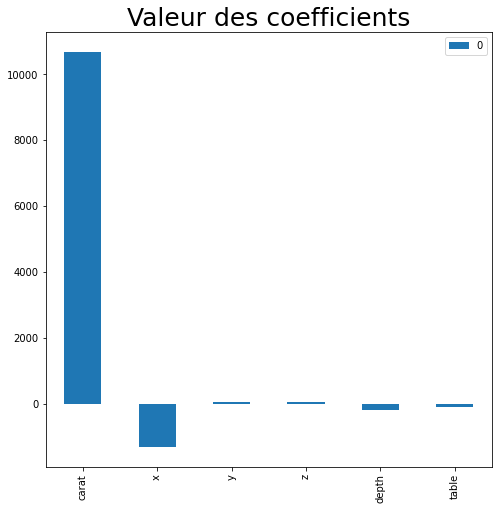

In [63]:
import matplotlib.pyplot as plt
df_coefs = pd.DataFrame(lr.coef_, index=selected_columns_X)
df_coefs.plot.bar(figsize=(8, 8))
plt.title("Valeur des coefficients", fontsize=25)
plt.show()

Text(0.5, 1.0, 'Prix et prix prédit moyens')

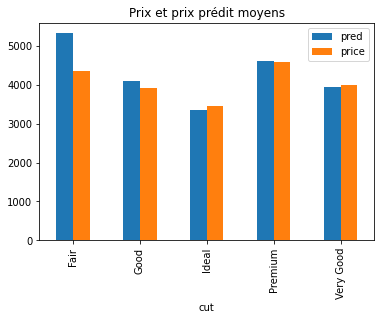

In [64]:
df.groupby("cut")[["pred", "price"]].mean().plot(kind='bar')
plt.title("Prix et prix prédit moyens")

Text(0.5, 1.0, 'Ecarts types des prix et prix prédits')

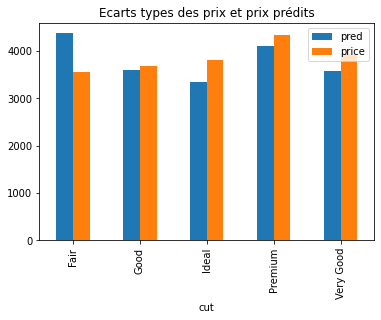

In [65]:
df.groupby("cut")[["pred", "price"]].std().plot(kind='bar')
plt.title("Ecarts types des prix et prix prédits")

Text(0.5, 0.98, 'Densité du prix et du prix prédit')

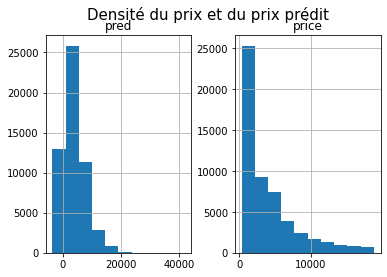

In [66]:
import matplotlib.pyplot as plt
df[["pred", "price"]].hist()
plt.suptitle("Densité du prix et du prix prédit", fontsize=15)

- Avec du pur ``matplotlib``

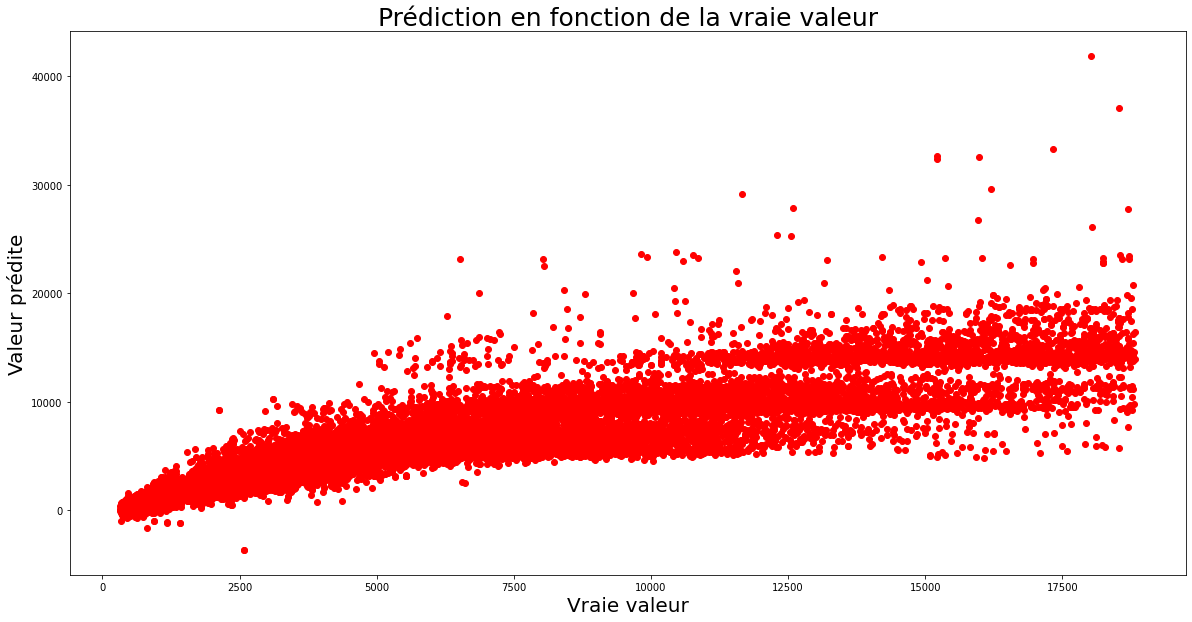

In [67]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plt.scatter(df.price, df.pred, color="red")
plt.xlabel("Vraie valeur", fontsize=20)
plt.ylabel("Valeur prédite", fontsize=20)
plt.title("Prédiction en fonction de la vraie valeur", fontsize=25)
plt.show()

# [Ex. 2] Création de données de tests

### Question 1

> On veut créer un historique de ventes pour tester le code d'un future site de ecommerce - on peut le résumer dans le fichier CSV suivant :  

|        timestamp | customer_id | product_id | quantity | price | revenue |
|-----------------:|------------:|-----------:|---------:|------:|--------:|
| 2022/12/27 13:05 |        1986 |       3456 |        4 |     5 |      20 |
| 2022/12/27 13:05 |        1986 |       3459 |        3 |     6 |      18 |
| 2022/12/27 13:06 |       24501 |       1242 |        2 |     4 |       8 |
| 2022/12/27 13:12 |       48285 |       3424 |        4 |    25 |     100 |
| 2022/12/27 13:14 |        2422 |       3456 |       10 |     5 |      50 |
|              ... |         ... |        ... |      ... |   ... |     ... |


- timestamp (datetime)
- customer_id (int)
- product_id (int)
- quantity (int)
- price (int)
- revenue (int)


De plus on souhaite que l'historique vérifie les contraintes suivantes : 
- La période va du 2022/07/01 00:00:00 au 2022/12/31 23:59:59 (inclus)
- 100 000 transactions (lignes) 
- 4000 clients différents
- 250 produits différents avec un prix moyen de 15 €
- La quantité moyenne vendue par transaction est de 2.1 unités
- Un même produit est toujours vendu au même prix

**Créer un tel fichier**


### Question 2 
On ajoute les contraintes suivantes : 
- Lorsque l'on achète le mardi, on bénéficie d'une remise (crée une colonne discount)
    - De 5% pour une transaction de 1 à 3 produits
    - De 10% pour une transaction à partir de 4 produits
- Les clients sont 50 % à faire au moins une transaction par mois sur tout la période
- 10 % des clients font une seule transaction sur toute la période


**Créer un tel fichier**


In [287]:
len(hour_weights), sum(hour_weights)

(24, 1.0000000000000002)

In [354]:
# Question 1

# La période va du 2022/07/01 00:00:00 au 2022/12/31 23:59:59 (inclus)
# 100 000 transactions (lignes)
# 4000 clients différents
# 250 produits différents avec un prix moyen de 15 €
# La quantité moyenne vendue par transaction est de 2.1 unités
# Un même produit est toujours vendu au même prix


N_PRODUITS = 50
N_CLIENTS = 4_000
N_TRANSACTIONS = 100_000
DATE_START = datetime.date(2022, 7, 1)
DATE_END = datetime.date(2022, 12, 31)


######################################################################
# Fonctions qui génère des données "intelligemment"
######################################################################

def generate_random_price():
    return np.random.choice(
        [12, 14, 15, 16, 17, 18], 
        p=[0.4,0.05,0.1,0.05,0.2, 0.2]
    )

def generate_random_quantity():
    return np.random.choice(
        [1, 2, 3, 4, 5], 
        p=[0.25,0.55,0.1,0.05,0.05]
    )

def generate_random_hour():
    hour_weights = [1/24 / 4 for _ in range(7)] + [1 /24 / 2 for _ in range(12)]  +[0.6770833333333334 / 5 for _ in range(5)]
    return np.random.choice(
        list(range(24)),
        p=hour_weights
    )  

def generate_random_minute():
    return np.random.randint(0, 60)

def generate_random_second():
    return np.random.randint(0, 60)


######################################################################
# Générations des infos qu'on retrouve dans les transactions
######################################################################

# Génére des couples produits et prix
# => Assure que j'aurais le même prix par produit
products = [
    (_id, generate_random_price()) 
    for _id in range(1, N_PRODUITS+1)
]

# On génère les client ids
client_ids = list(range(1, N_CLIENTS+1))

# Pour les dates : 
# Stratégie : piocher une date dans la liste des dates de la période 
# (pas d'a priori sur des dates en particulier, la même proba pour toute)
# On génère l'heure, avec des a priori - cf fonctions ci-dessus
# (Minutes et seconds pas d' a priori)

# Liste des dates
possible_dates = []
date = DATE_START
while date <=  DATE_END:
    possible_dates.append(date)
    date += datetime.timedelta(days=1)

# On vérifie que première et dernières sont les bonnes
print(possible_dates[0])
print(possible_dates[-1])


timestamps = []
for _ in range(10_000):
    # On pioche une date
    date = np.random.choice(possible_dates)
    # On crée la timestamp en combinant
    timestamp = datetime.datetime.combine(
        date, # la date
        datetime.time( # et l'heure (au sens: heure, minute et seconde)
            hour=generate_random_hour(),
            minute=generate_random_minute(),
            second=generate_random_second()
        )
    )
    timestamps.append(timestamp)
    
    
## Showtime


####################################
# DataFrame creation & Timestamp
####################################

# On crée une dataframe avec le bon nombre de ligne 
# (Car c'est le nombre de dates)
df = pd.DataFrame({"timestamp": timestamps})

####################################
# Ajout du client
####################################

# On pioche un client_id par date
df["client_id"] = [np.random.choice(client_ids) for _ in range(len(df))]


####################################
# Ajout infos produits
####################################

# On pioche un produit par date (c'est un TUPLE !!!)
df["product"] = [
    products[np.random.choice(range(len(products)))] for _ in range(len(df))
]
# On extrait le produit_id et le prix
df["produit_id"] = df["product"].map(lambda t: t[0])
df["price"] = df["product"].map(lambda t: t[1])
# On se débarasse de la colonne avec le tuple
df = df.drop("product", axis=1)

####################################
# Ajout de la quantité
####################################
df["quantity"] = [generate_random_quantity() for _ in range(len(df))]

2022-07-01
2022-12-31


In [304]:



timestamps = [
    
    for _id in range(1, N_TRANSACTIONS)
]




SyntaxError: invalid syntax (4131718665.py, line 3)

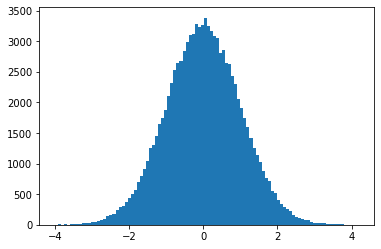

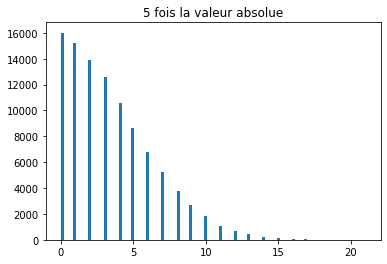

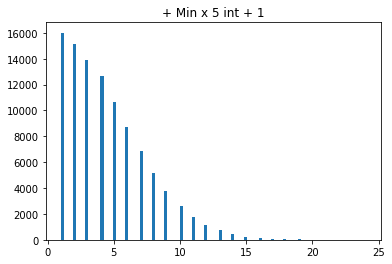

3
mean_sample=1.1199
mean_theoric=1.12


In [270]:
import numpy as np

# Un Array d'Array
# Chaque composante suit une loi normale :
# symétrique / 99 % de chance d'être entre -4 et 4
np.random.randn(4, 2)  # 4 lignes, 2 colonnes

import matplotlib.pyplot as plt 
plt.hist(numpy.random.randn(100_000), bins=100)
plt.show()


# Pour positivité -> valeur absolute 
# x 5 pour échelles de valeurs
# on arrondit 
# + 1 pour décaler et ne pas avoir de prix à 0
import matplotlib.pyplot as plt 
prices = 5 * pd.Series(np.random.randn(100_000)).abs()
prices = prices.map(int)
plt.hist(prices, bins=100)
plt.title("5 fois la valeur absolue")
plt.show()


# Autre solution
import matplotlib.pyplot as plt 
prices = 5 * pd.Series(np.random.randn(100_000)).abs()
prices = prices - prices.min() # min est négatif
prices = prices.map(int) + 1
plt.hist(prices, bins=100)
plt.title("+ Min x 5 int + 1")
plt.show()


#### Aussi
## np.random.exponential(2)


### Renvoie une valeur au hasard dans une liste 
print(np.random.choice([1, 2, 3, 4]))
np.random.choice([1, 2, 3, 4], p=[0.94, 0.02, 0.02, 0.02])

sample = [
    np.random.choice([1, 2, 3, 4], p=[0.94, 0.02, 0.02, 0.02])
    for _ in range(10_000)
]

mean_sample = np.mean(sample)
# Moyenne = Somme des (Proba * Valeur)
mean_theoric = 1*0.94 + 2*0.02 + 3*0.02 + 4*0.02

print(f"mean_sample={mean_sample}")
print(f"mean_theoric={mean_theoric}")